In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler ,  PolynomialFeatures
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error , mean_absolute_percentage_error , r2_score
from sklearn.linear_model import LinearRegression  , Lasso , Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , VotingRegressor , StackingRegressor , BaggingRegressor , GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [6]:
df = pd.read_csv("assignment1 - regression/employee_data.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [8]:
df.head(10)

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397
5,6,F,13,Web Developer,114998
6,7,F,11,Systems Administrator,82328
7,8,M,2,DevOps Engineer,111494
8,9,F,6,DevOps Engineer,105563
9,10,F,6,IT Manager,162706


In [9]:
df.columns

Index(['ID', 'Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')

In [10]:
df.describe(include="all")

,ID,Gender,Experience (Years),Position,Salary
count,400.000000,400,400.000000,400,400.00000
unique,NaN,2,NaN,11,NaN
top,NaN,M,NaN,Web Developer,NaN
freq,NaN,202,NaN,43,NaN
mean,200.500000,NaN,9.670000,NaN,131701.19750
std,115.614301,NaN,6.101571,NaN,43351.50899
min,1.000000,NaN,0.000000,NaN,43643.00000
25%,100.750000,NaN,4.000000,NaN,100484.75000
50%,200.500000,NaN,10.000000,NaN,128561.50000
75%,300.250000,NaN,15.000000,NaN,157735.00000


In [11]:
df.isna().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

<Axes: xlabel='count', ylabel='Position'>

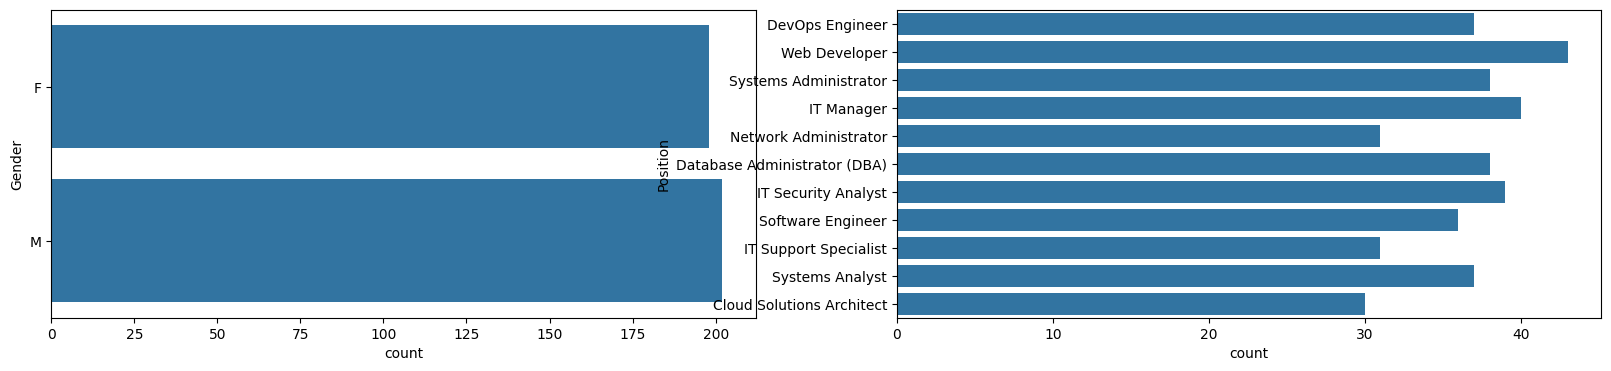

In [12]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.countplot(y=df["Gender"])
plt.subplot(1,2,2)
sns.countplot(y=df["Position"])

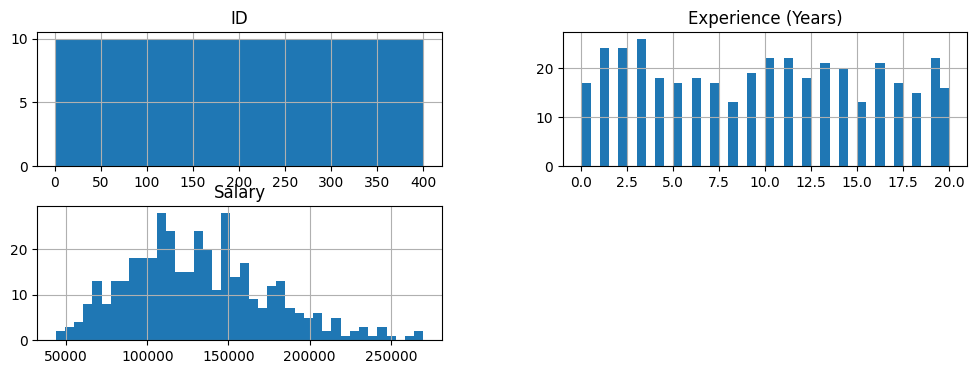

In [13]:
df.hist( bins = 40 , figsize = (12,4) )
plt.show()

In [14]:
df.drop(columns=["ID"] , inplace=True)

In [15]:
df.head()

,Gender,Experience (Years),Position,Salary
0,F,4,DevOps Engineer,109976
1,M,6,DevOps Engineer,120088
2,M,17,Web Developer,181301
3,M,7,Systems Administrator,77530
4,F,13,Systems Administrator,152397


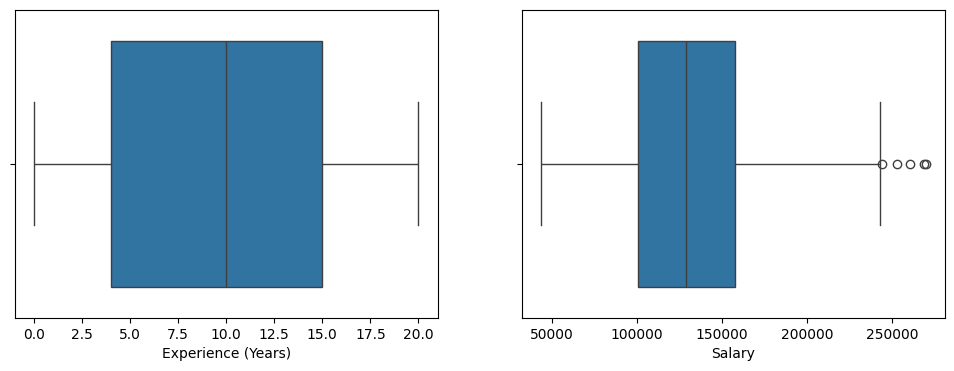

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['Experience (Years)'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Salary'])
plt.show()

In [19]:
q1 = df["Salary"].quantile(.25)
q3 = df["Salary"].quantile(.75)
IQR = q3 - q1 
lower = q1 - (1.5 * IQR)
upper = q3 + (1.5 * IQR)
print(lower)
print(upper)


14609.375
243610.375


In [20]:
df = df[(df["Salary"] <= upper) & (df["Salary"] >= lower)]

In [21]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Position"] = le.fit_transform(df["Position"])

In [22]:
df.corr()

,Gender,Experience (Years),Position,Salary
Gender,1.000000,-0.023988,-0.026299,-0.044992
Experience (Years),-0.023988,1.000000,-0.016103,0.614757
Position,-0.026299,-0.016103,1.000000,-0.340351
Salary,-0.044992,0.614757,-0.340351,1.000000


In [23]:
df.corr()["Salary"]

Gender               -0.044992
Experience (Years)    0.614757
Position             -0.340351
Salary                1.000000
Name: Salary, dtype: float64

In [24]:
x = df.drop(columns=['Salary'])
y = df["Salary"]
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=.7 , random_state= 42)

In [25]:
Model1 = LinearRegression()
Model1.fit(x_train , y_train)
y_predict1 = Model1.predict(x_test)

In [26]:
error = mean_squared_error(y_test , y_predict1)
print(error)
rmse = np.sqrt(error)
print(rmse)
print(mean_absolute_error(y_test , y_predict1))
print(mean_absolute_percentage_error(y_test , y_predict1))
print(r2_score(y_test , y_predict1))

857746188.8226714
29287.30422593844
24707.39488687341
0.21038166532643557
0.5143396212000876


In [27]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
model2 = LinearRegression().fit(x_train_scaled , y_train)
y_scaled_predict = model2.predict(x_test_scaled)

In [29]:
error = mean_squared_error(y_test , y_scaled_predict)
print(error)
rmse = np.sqrt(error)
print(rmse)
print(mean_absolute_error(y_test , y_scaled_predict))
print(mean_absolute_percentage_error(y_test , y_scaled_predict))
print(r2_score(y_test , y_scaled_predict))

857746188.8226714
29287.30422593844
24707.394886873404
0.2103816653264355
0.5143396212000876


In [30]:
Model3 = DecisionTreeRegressor()
Model3.fit(x_train,y_train)
y_predict3 = Model3.predict(x_test)

In [31]:
error = mean_squared_error(y_test , y_predict3)
print(error)
rmse = np.sqrt(error)
print(rmse)
print(mean_absolute_error(y_test , y_predict3))
print(mean_absolute_percentage_error(y_test , y_predict3))
print(r2_score(y_test , y_predict3))

1272794629.0109708
35676.247406516435
27990.441176470587
0.2318940854780625
0.2793370233350506


In [38]:
# stacking Regressor
base_models =[
    ('LR' , LinearRegression()),
    ('dt' , DecisionTreeRegressor(random_state= 42 )),
    ('rf' , RandomForestRegressor(n_estimators=10 , random_state=42)),
    ('knn', KNeighborsRegressor(n_neighbors=5 ))
] 
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models , final_estimator= meta_model , cv = 5 )   ## cv sum of base models and meta model

stacking_model.fit(x_train , y_train)
y_predict_stacking = stacking_model.predict(x_test)

In [39]:
error = mean_squared_error(y_test , y_predict_stacking)
print(error)
rmse = np.sqrt(error)
print(rmse)
print(mean_absolute_error(y_test , y_predict_stacking))
print(mean_absolute_percentage_error(y_test , y_predict_stacking))
print(r2_score(y_test , y_predict_stacking))

780975664.5487851
27945.941826118244
23617.606350759623
0.19962109085189997
0.5578074936143032


In [40]:
# stacking Regressor *scaled*
base_models =[
    ('LR' , LinearRegression()),
    ('dt' , DecisionTreeRegressor(random_state= 42 )),
    ('rf' , RandomForestRegressor(n_estimators=10 , random_state=42)),
    ('knn', KNeighborsRegressor(n_neighbors=5 ))
] 
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models , final_estimator= meta_model , cv = 5 )   ## cv sum of base models and meta model

stacking_model.fit(x_train_scaled , y_train)
y_predict_stacking = stacking_model.predict(x_test_scaled)

In [41]:
error = mean_squared_error(y_test , y_predict_stacking)
print(error)
rmse = np.sqrt(error)
print(rmse)
print(mean_absolute_error(y_test , y_predict_stacking))
print(mean_absolute_percentage_error(y_test , y_predict_stacking))
print(r2_score(y_test , y_predict_stacking))

772840936.0565577
27800.016835544502
23494.70472721176
0.19905618279623738
0.5624134194376429
